<a href="https://colab.research.google.com/github/Mefamex/ozel-ucgenler-Custom-triangles-2023/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:

Number_path="D:\\SOFTWARE\\PPython\\pychrm\\handy_AI_forScreen\\SS"
Numbers_name_path=[ [int(q[0]) , Number_path+"\\"+q] for q in os.listdir(Number_path)]
for q in Numbers_name_path:print(q)


img_size = (64,64)
images = []
labels = []

for label,file_path in Numbers_name_path:
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, img_size)
    images.append(img)

    labels.append(label)

images = np.array(images) / 255.0
labels = np.array(labels)
print("images size=",images.shape)
print("labes size=",labels.shape)
print(images)
print(labels)







model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(img_size[0], img_size[1], 1)))
model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid")) #


model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
#           loss='binary_crossentropy'


model.fit(images, labels, epochs=100,shuffle=True)#, validation_split=0.4
#model.save("path/to/save/model.h5")

for lab,pat in Numbers_name_path:
    prediction = model.predict(
        np.array(   cv2.resize(
                cv2.imread(pat, cv2.IMREAD_GRAYSCALE), img_size)    ).reshape(-1, img_size[0], img_size[1], 1)  )

    print("Tahmin: ",lab, prediction)


input()


In [ ]:
# -*- coding: utf-8 -*-
"""Created on Thursday, January 4 15:57:00 2024

@author: mefamex"""

!pip install pytorch
!pip install pytorch_lightning

import os
import random
import numpy as np
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, Input
from keras.optimizers import Adam



import cv2 , csv
from numpy import genfromtxt

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import torch
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

False


In [ ]:
print(os.getcwd(),os.listdir())
df_Train=pd.read_csv('train.csv')
df_Test=pd.read_csv('test.csv')
print(df_Train.shape)
print(df_Test.shape)
X = df_Train.iloc[:, 1:].values
y = df_Train.iloc[:, 0].values
print(X.shape, y.shape)

/content ['.config', 'train.csv', 'sample_data', 'test.csv']
(24668, 785)
(28000, 784)
(24668, 784) (24668,)


In [ ]:
sns.countplot(y)

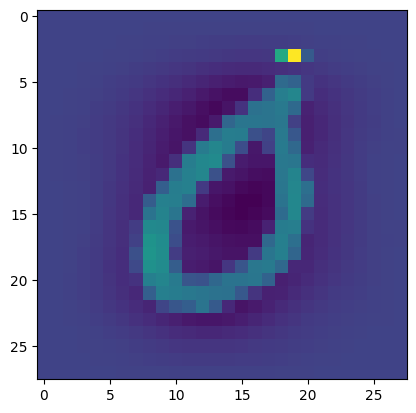

In [ ]:
 plt.imshow(X[1029].reshape((28,28)),interpolation='nearest')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

ValueError: Found array with dim 4. StandardScaler expected <= 2.

In [ ]:
# -*- coding: utf-8 -*-
#Created on Thursday, January 04 15:57:00 2024
#@author: mefamex

from random import random, choice, randint
from time import time, sleep

def printt(*args):
    for q in "".join(args):
        print(q,flush=True,end="")
        #sleep(0.01)
    print("")

import sys, os

printt("___________platform (win32)", sys.platform)
printt("___________os.version (3.11.1)", sys.version.split(" ")[0])
printt("___________current path=", os.getcwd())
printt("___________path=", sys.path[0])


printt("______imported: random.random")
printt("______imported: random.randint")
printt("______imported: random.choice")
printt("______imported: time.time")
printt("______imported: time.sleep")

from functools import partial
printt("______imported: functools.partial")
printt("______importing from kivy",*["\n\t\t\t+ "+q for q in ["App","Widget","Button","GridLayout",
                    "Label","Color","Rectangle","Clock",]])
### python -m pip install --ignore-installed kivy.deps.sdl2 kivy.deps.glew
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.uix.button import Button
from kivy.uix.gridlayout import GridLayout
from kivy.uix.label import Label
from kivy.graphics import Color, Rectangle, Line
from kivy.clock import Clock
print("______imported: kivy requirements")
import .//main_deep_forapp as DL
print("______imported: main_deep_forapp ")
import numpy
sleep(0.2)
del printt

_MAX_NOR, _MAX_LIN = 2, 3  # length of integer length
_nor_types: list[str] = ["inp", "mid", "out"]

"""real_X = [[random.random(), random.random(),1 ] for _ in range(100)]
def fff(x,y,z): return [x,x-y,(x+y)/2+0.2]
real_Y = [ fff(*q) for q in real_X]"""
"""real_X = [[random.random()*3,random.random()*0.5,0.1] for _ in range(10000)]
def fff(x,y,z): return [x,0.1,0.2 ]
real_Y = [ fff(*q) for q in real_X]
"""

real_X,real_Y=[],[]
for q1 in range(2):
    for q2 in range(2):
        for q3 in range(2):
            for q4 in range(2):
                for q5 in range(2):
                    for q6 in range(2):
                        for q7 in range(2):
                            real_X.append([q1,q2,q3,q4,q5,q6,q7,])
                            real_Y.append([q1,q6])

print(numpy.array(real_X).shape,numpy.array(real_Y).shape)

class mainLayout(Widget):

    def __init__(self, **kwargs):
        super(mainLayout, self).__init__(**kwargs)
        self.rect = Rectangle(pos=self.pos, size=self.size)
        self.on_pos()

        self.Gridmain=GridLayout(rows=1,pos=self.center,size=self.size,orientation="rl-tb")
        self.add_widget(self.Gridmain)
        self.Linewidget = Widget()
        self.Dnorons, self.Dlines = [], []
        self.DEEP = DL.MY_AI()
        self.createDeep()

        self.renewloadD()

        #Clock.schedule_interval(self.pressedbtn, timeout=0.5)
        Clock.schedule_once(partial(self.on_size, [self, self.size]), timeout=0.1)
        Clock.schedule_interval(partial(self.on_size,self, self.size,False), timeout=0.5)



    def createDeep(self):
        self.DEEP.add_norons(nor_type="inp", count=7, func=DL.matt().funcs[0])
        self.DEEP.add_norons(nor_type="mid", count=4, func=DL.matt().funcs[0])
        #self.DEEP.add_norons(nor_type="mid", count=4, func=DL.matt().funcs[0])
        #self.DEEP.add_norons(nor_type="mid", count=4, func=DL.matt().funcs[0])
        self.DEEP.add_norons(nor_type="out", count=2, func=DL.matt().funcs[0])



    def renewloadD(self):

        self.Linewidget = Widget()
        self.add_widget(self.Linewidget)
        self.Dlines ,self.Dnorons = [], []

        for norr in self.DEEP.Norons:
            daire=Button(text=norr.name+"\n"+str(norr.w),background_color=(1,1,1,.5),color=(1,1,1,1),
                         pos=self.center,bold=True,halign='center')
            daire.nor=norr
            daire.bind(on_press=self.pressedbtn)
            self.Dnorons += [daire]
        for lin in self.DEEP.Lines:
            lin.points=[0,0,0,0]
            linee = Widget()
            with linee.canvas:Line(color=(1,1,1,1),points=[0,0,0,0])
            self.Linewidget.add_widget(linee)
            self.Dlines  += [lin]

        for _ in range(self.Dnorons[-1].nor.group+1):
            self.Gridmain.add_widget(GridLayout(cols=1))
        for nor in self.Dnorons:
            self.Gridmain.children[nor.nor.group].add_widget(nor)


    def pressedbtn(self,instance):
        self.DEEP.fit(X=real_X, Y=real_Y, epoch=1, patch=0)
        print("examples , in, predict , out",real_X[0],self.DEEP.predict(real_X[0]),real_Y[0],sep="\n")
        self.on_size(self, self.size)
        Clock.schedule_once(self.pressedbtn,timeout=0.1)



    def on_size(self, *args):
        if args[-2] is not False:print("SIZE CHANGED; on_size=", args[1])
        self.Gridmain.size,self.Gridmain.pos=(self.width*0.9,self.height*.9),(self.width*.05,self.height*.05)
        self.rect.size = self.size
        if self.Gridmain.children:
            self.Gridmain.spacing=(self.Gridmain.width - self.Gridmain.children[0].children[0].texture_size[0]*self.DEEP.Groups.__len__()*1.4) / (self.DEEP.Groups.__len__()-1)
            for layy in self.Gridmain.children:
                layy.spacing=(self.Gridmain.height - layy.children[0].texture_size[1] * layy.children.__len__()*2) / ((layy.children.__len__()-1 if layy.children.__len__() > 1 else 1))
                #layy.spacing=self.Gridmain.height / (layy.children.__len__()+1) - layy.children[0].texture_size[1]

        else: self.Gridmain.spacing=10

        if self.Gridmain.children:
            self.Linewidget.clear_widgets()
            for daire in self.Dnorons:daire.text=daire.nor.name+"\n"+str(daire.nor.w)[:6]
            for lin in range(self.Dlines.__len__()):
                bas, son = 0 , 0
                for nor in self.Dnorons:
                    if nor.nor == self.DEEP.Lines[lin].before: bas = nor
                    elif nor.nor == self.DEEP.Lines[lin].after: son = nor
                if bas == 0: self.Dlines[lin].points=  [son.x, son.center_y, son.x-20, son.center_y]
                elif son == 0: self.Dlines[lin].points=[bas.right, bas.center_y, bas.right+20, bas.center_y]
                else :self.Dlines[lin].points=         [bas.right, bas.center_y, son.x, son.center_y]

                linee=Widget()
                colorred = 0 if self.Dlines[lin].w > 0 else abs(self.Dlines[lin].w)
                colorgreen = 0 if self.Dlines[lin].w <= 0 else self.Dlines[lin].w
                colorblue = 0 if -2 < self.Dlines[lin].w < 2 else 1
                with linee.canvas:
                    Color(colorred, colorgreen, colorblue,1)
                    widthh=abs(self.Dlines[lin].w)*10
                    if widthh<1:
                        widthh=1
                        colorblue,colorred,colorgreen=1,1,1
                        Color(colorred, colorgreen, colorblue, 1)
                    Line(color=(colorred, colorgreen, colorblue,1), width=widthh, points=self.Dlines[lin].points)
                textline=Label(text=str(self.Dlines[lin].w)[:5],color=(1,1,1,1),bold=True,font_size=int(abs(self.Dlines[lin].w)*5)+10)
                textline.center_x=(self.Dlines[lin].points[0]+(self.Dlines[lin].points[2]-self.Dlines[lin].points[0])*0.3)
                textline.center_y = (self.Dlines[lin].points[1] + (self.Dlines[lin].points[3]-self.Dlines[lin].points[1] ) *0.3 )
                self.Linewidget.add_widget(linee)
                self.Linewidget.add_widget(textline)




    def on_pos(self, *args):
        self.rect.pos = self.pos
        print("POSITION CHANGED; on_pos=", args)







class DeepApp(App):
    def build(self):
        self.icon = ".\\Images\\Mefamex_isaret_white.png"
        self.title = "Deep_App"
        return mainLayout()

print(DeepApp().run())

___________platform (win32)linux
___________os.version (3.11.1)3.10.12
___________current path=/content
___________path=/content
______imported: random.random
______imported: random.randint
______imported: random.choice
______imported: time.time
______imported: time.sleep
______imported: functools.partial
______importing from kivy
			+ App
			+ Widget
			+ Button
			+ GridLayout
			+ Label
			+ Color
			+ Rectangle
			+ Clock
______imported: kivy requirements
______imported: main_deep_forapp 
(128, 7) (128, 2)


OSError: source code not available

In [ ]:
!pip install kivy